In [1]:
text = 'You say goodbye and I say hello.'

In [2]:
text = text.lower() # 소문자 변환
text

'you say goodbye and i say hello.'

In [3]:
text = text.replace('.', ' .') # 마침표 앞 공백 삽입
text

'you say goodbye and i say hello .'

In [4]:
words = text.split(' ') # 공백 기준 분할
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [5]:
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [6]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [7]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [8]:
id_to_word[1]

'say'

In [9]:
word_to_id['hello']

5

In [10]:
# '단어 목록' -> '단어 ID 목록'
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [11]:
# 전처리 함수
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    text = text.split(' ')
    
    word_to_id = {}
    id_to_word = {}
    
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    
    corpus = [word_to_id[w] for w in words]
    corpus = np.array(corpus)
    
    return corpus, word_to_id, id_to_word

In [12]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [13]:
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(corpus[2])
print(id_to_word)

[0 1 2 3 4 1 5 6]
2
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [14]:
# co-occurrence matrix, 동시발생 행렬
C = np.array([
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 1, 0],
], dtype = np.int32)

In [15]:
print(C[0])

[0 1 0 0 0 0 0]


In [16]:
print(C[4])

[0 1 0 1 0 0 0]


In [17]:
print(C[word_to_id['goodbye']])
print(C[2])

[0 1 0 1 0 0 0]
[0 1 0 1 0 0 0]


In [18]:
# co-occurrence matrix, 동시발생 행렬 자동화 함수
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype = np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i
            
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
            
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
            
    return co_matrix

In [19]:
def cos_similarity(x, y, eps=1e-7):
    nx = x / (np.sqrt(np.sum(x**2)) + eps)
    ny = y / (np.sqrt(np.sum(y**2)) + eps)
    return np.dot(nx, xy)

In [20]:
# 유사도 구하기
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(cos_similarity(c0, c1))
# 코사인 유사도 값은 -1 ~ 1
# 비교적 높다(유사성이 크다)

0.7071067691154799


In [21]:
# 유사 단어 랭킹 표시
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    # 검색어를 꺼낸다
    if query not in word_to_id:
        print("Can't find -> %s " %query)
        return
    
    print("\n[query] " + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # 코사인 유사도 계산
    vocab_size = len(id_to_word) # word_to_id 동일 
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
    
    # 코사인 유사도를 기준으로 내림차순으로 출력 
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print('%s: %s' %(id_to_word[i], similarity[i]))
        
        count += 1
        if count >= top:
            return 

In [22]:
x = np.argsort([100, -20, 2]) # 오름차순 정렬
x

array([1, 2, 0])

In [23]:
(-x).argsort() # 내림차순 정렬

array([1, 0, 2])

In [24]:
# 유사 단어 랭킹 표시
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
goodbye: 0.7071067691154799
i: 0.7071067691154799
hello: 0.7071067691154799
say: 0.0
and: 0.0


In [25]:
k = np.array([[1,2,3],[4,5,6]])
k

array([[1, 2, 3],
       [4, 5, 6]])

In [26]:
k.shape[0]

2

In [27]:
k.shape[1]

3

In [28]:
np.sum(k, axis=0)

array([5, 7, 9])

In [29]:
np.sum(k)

21

In [30]:
def ppmi(C, verbose=True, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C) # 전체 합
    S = np.sum(C, axis=0) # 각 항목 합
    total = C.shape[0] * C.shape[1] # 행x열 전체 개수
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2( (C[i, j]*N) / (S[i]*S[j]) + eps)
            M[i, j] = max(0, pmi)
            
        if verbose:
            cnt += 1
            if cnt % (total//100 + 1) == 0:
                print('%.1f%% 완료' % (100*cnt/total))
    return M

In [31]:
# ppmi 변환
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3) # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

2.0% 완료
4.1% 완료
6.1% 완료
8.2% 완료
10.2% 완료
12.2% 완료
14.3% 완료
동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [32]:
# ppmi 변환 -> SVD 적용
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

2.0% 완료
4.1% 완료
6.1% 완료
8.2% 완료
10.2% 완료
12.2% 완료
14.3% 완료


In [33]:
print(C) # 동시 발생 행렬
print(W) # PPMI 행렬
print(U) # SVD

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]
[[ 0.000e+00 -3.409e-01 -3.886e-16  1.205e-01  9.323e-01 -1.110e-16
   3.207e-16]
 [-5.976e-01  0.000e+00  1.802e-01  0.000e+00  0.000e+00 -7.812e-01
   0.000e+00]
 [-5.551e-17 -4.363e-01 -2.220e-16  5.088e-01 -2.253e-01 -1.388e-17
  -7.071e-01]
 [-4.978e-01 -3.579e-16  6.804e-01  8.979e-17  7.617e-17  5.378e-01
  -8.846e-17]
 [-4.329e-17 -4.363e-01 -2.217e-16  5.088e-01 -2.253e-01 -1.804e-17
   7.071e-01]
 [-4.329e-17 -7.092e-01 -2.217e-16 -6.839e-01 -1.710e-01 -1.804e-17
  -1.048e-16]
 [-6.285e-01  4.899e-16 -7.103e-01 -1.297e-16 -2.166e-16  3.169e-01
   1

In [34]:
print(C[0]) # 동시 발생 행렬
print(W[0]) # PPMI 행렬
print(U[0]) # SVD

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 0.000e+00 -3.409e-01 -3.886e-16  1.205e-01  9.323e-01 -1.110e-16
  3.207e-16]


In [35]:
print(U[0, :2])

[ 0.    -0.341]


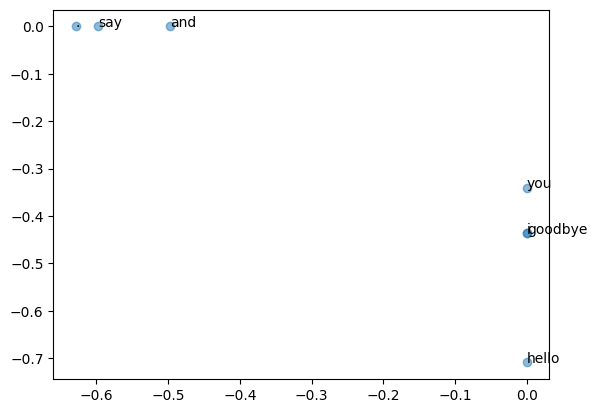

In [36]:
import matplotlib.pyplot as plt
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

In [37]:
import sys
sys.path.append('..')
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

말뭉치 크기: 929589
corpus[:30] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [5]:
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

import time # time 라이브러리 import
start = time.time() # 시작
time.sleep(1) # 측정하고자 하는 코드 부분\


window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산')
W = ppmi(C, verbose=True)

print('SVD 계산')
try:
  # truncated SVD(빠르다)
  from sklearn.utils.extmath import randomized_svd
  U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)

except ImportError:
  # SVD(느리다)
  U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
  most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

print(f"{time.time()-start:.4f} sec", f"{ (time.time()-start) / 60.0:.4f} min") # 종료와 함께 수행시간 출력

동시발생 수 계산
PPMI 계산
1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
SVD 계산

[query] you
 i: 0.6981675624847412
 we: 0.6217465400695801
 anybody: 0.6017088890075684
 'd: